In [20]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
import graphviz

In [21]:
given_set = pd.read_csv('CSVs/Social_Network_Ads.csv')
#Splitting
x = given_set.iloc[:,:-1].values
y = given_set.iloc[:,-1].values
#Preprocessing
enc = LabelEncoder()
sc = StandardScaler()
#OHE gender
x[:,1] = enc.fit_transform(x[:,1])
#Standard Scaling the data
x = sc.fit_transform(x)
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2)

In [22]:
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
#Validation score
classifier.score(X_test,Y_test,)

0.9125

In [24]:
dot_file = StringIO()
dot_data = export_graphviz(classifier, out_file=dot_file, filled=True, rounded=True, special_characters=True)

In [25]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

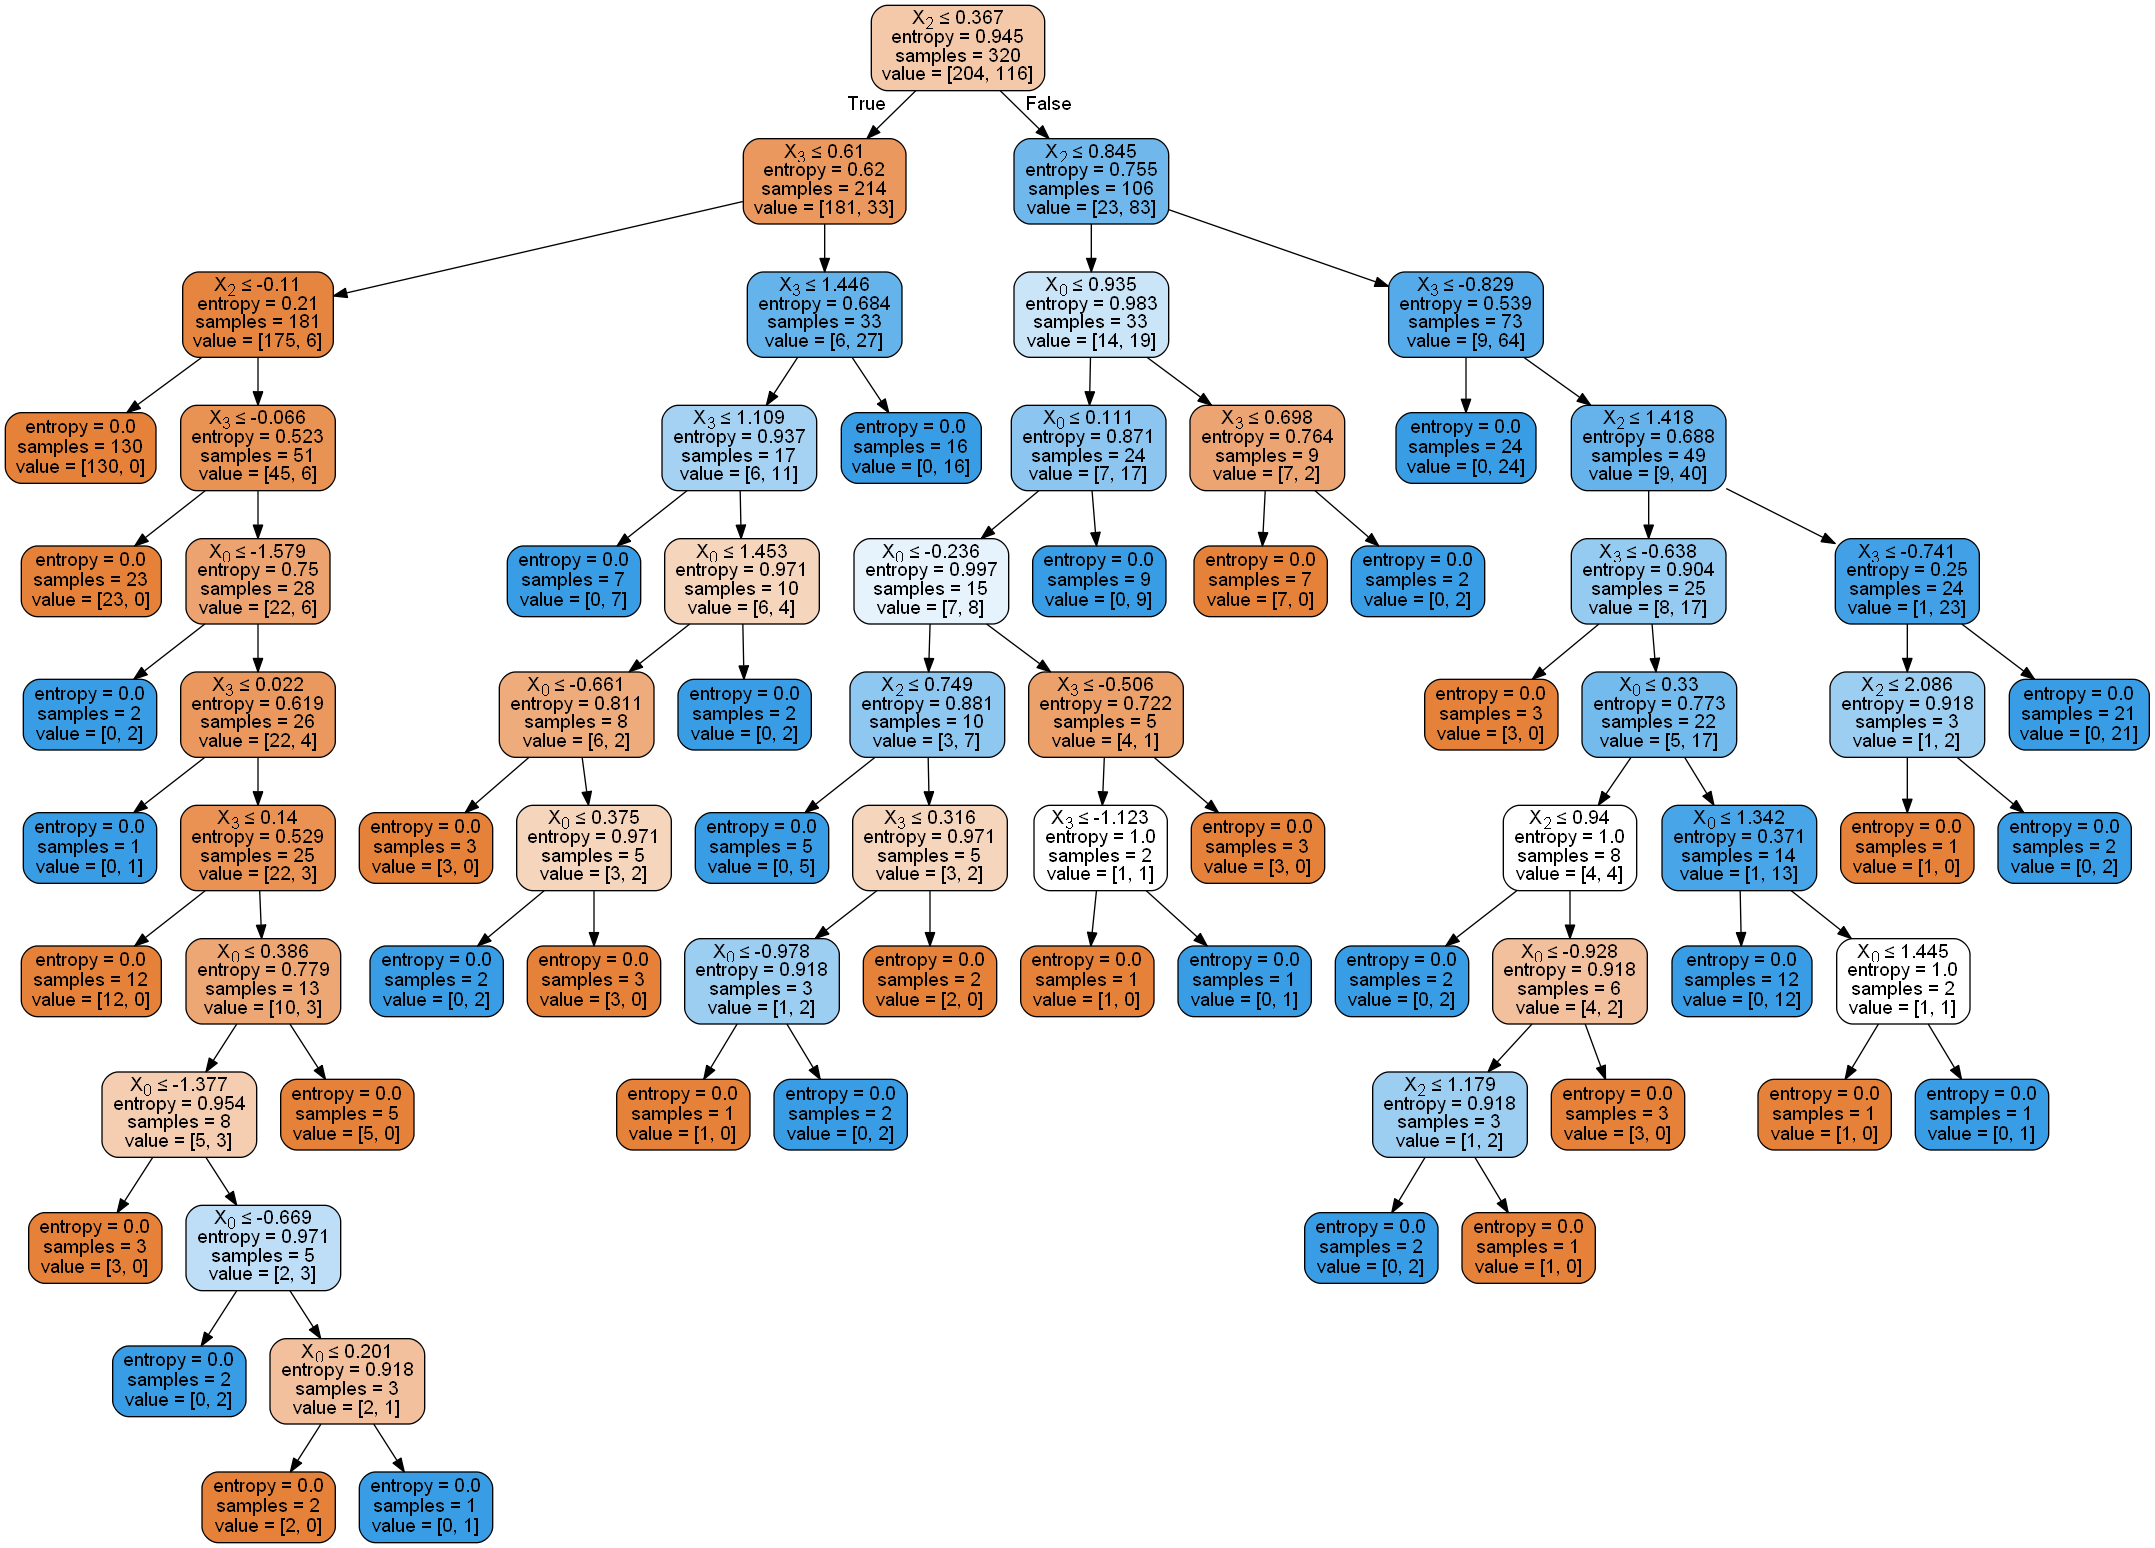

In [26]:
Image(pydotplus.graph_from_dot_data(dot_file.getvalue()).create_png())